In [1]:
# to do : some of the companions (99,106) are basically kicked out and difficult to include in figure
# to do : so many of them evolve to e1>1

In [2]:
from pylab import *
from models import *
from sort_OSPE_output import *
pd.set_option('display.max_rows', None)

removing files where a1>a2, for now...
sorting files...
34 / 133 didn't survive (Roche lobe overflow)
0 / 133 didn't survive (in perturber Roche lobe)
99 / 133 survived
0 / 133 produced error
of the ones that survived:
average time: 7572001706.165352


In [3]:
starroche = np.transpose([int(i[19:-4]) for i in zeros]) # inner planet tidally disrupted by star
survived = np.transpose([int(i[19:-4]) for i in ones_and_twos])
planetroche = np.transpose([int(i[19:-4]) for i in threes]) # inner planet tidally disrupted by outer planet
failed = np.transpose([int(i[19:-4]) for i in negatives])

crashed = [63, 4, 53, 60, 156, 198, 135, 132, 103, 10, 11, 108, 174, 200, 35, 6, 56]

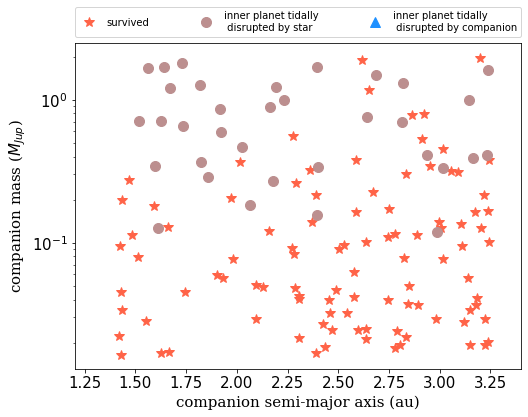

In [4]:
# end state of Kepler-1656b versus companion properties
companion_a_survived=[]; companion_m_survived=[]
companion_a_starroche=[]; companion_m_starroche=[]
companion_a_planetroche=[]; companion_m_planetroche=[]

for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)
        a2 = m.a2[-1]
        m2 = m.data[' m3 '].to_numpy()[-1]*Msun/Mjup
        if n in survived:
            companion_a_survived.append(a2)
            companion_m_survived.append(m2)
        elif n in starroche:
            companion_a_starroche.append(a2)
            companion_m_starroche.append(m2)
        elif n in planetroche:
            companion_a_planetroche.append(a2)
            companion_m_planetroche.append(m2)

plt.figure(figsize=(8,6))
plt.plot(companion_a_survived, companion_m_survived,'*',color='tomato',\
         label='survived',markersize=10)
plt.plot(companion_a_starroche, companion_m_starroche,'o',color='rosybrown',\
         label='inner planet tidally\n disrupted by star',markersize=10)
plt.plot(companion_a_planetroche, companion_m_planetroche,'^',color='dodgerblue',\
         label='inner planet tidally\n disrupted by companion',markersize=10)
plt.yscale('log')
plt.xlim(1.2,3.4)
plt.xlabel('companion semi-major axis (au)',fontsize=15,family='serif')
plt.ylabel('companion mass ($M_{Jup}$)',fontsize=15,family='serif')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=10)

Text(0.5, 1.0, 'Kepler-1656b final eccentricity')

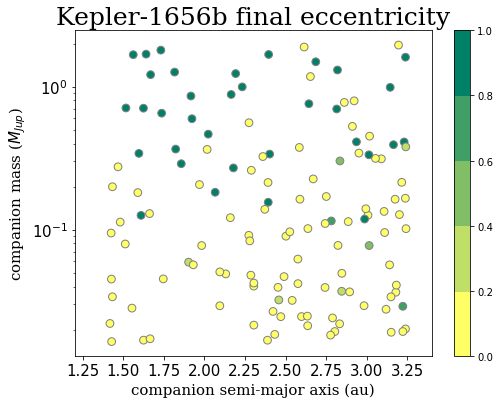

In [5]:
# final eccentricity of Kepler-1656b versus companion properties
planet_e1_final = []
companion_mass = []
companion_sep = []

for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)
        a2 = m.a2[-1]
        m2 = m.data[' m3 '].to_numpy()[-1]*Msun/Mjup
        e1 = m.e1[-1]
        
        companion_sep.append(a2)
        companion_mass.append(m2)
        planet_e1_final.append(e1)
        
cmap = cm.get_cmap('summer_r', 5) 
plt.figure(figsize=(8,6))  
plt.scatter(companion_sep, companion_mass,c=planet_e1_final,vmin=0,vmax=1,cmap=cmap,edgecolor='grey',s=60)
plt.yscale('log')
plt.xlim(1.2,3.4)
plt.xlabel('companion semi-major axis (au)',fontsize=15,family='serif')
plt.ylabel('companion mass ($M_{Jup}$)',fontsize=15,family='serif')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.colorbar()
plt.title('Kepler-1656b final eccentricity',fontsize=25,family='serif')

Text(0.5, 1.0, 'Kepler-1656b average eccentricity')

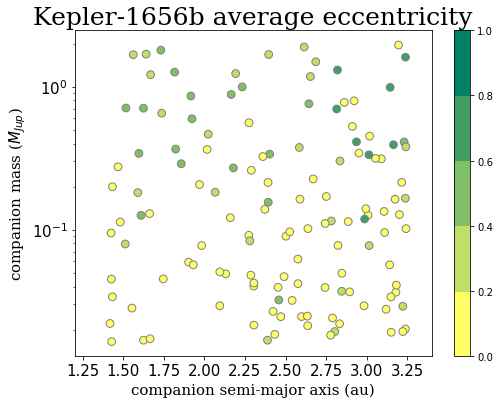

In [6]:
# average eccentricity of Kepler-1656b versus companion properties
planet_e1_avg = []

for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)
        planet_e1_avg.append(np.mean(m.e1))

cmap = cm.get_cmap('summer_r', 5) 
plt.figure(figsize=(8,6))  
plt.scatter(companion_sep, companion_mass,c=planet_e1_avg,vmin=0,vmax=1,cmap=cmap,edgecolor='grey',s=60)
plt.yscale('log')
plt.xlim(1.2,3.4)
plt.xlabel('companion semi-major axis (au)',fontsize=15,family='serif')
plt.ylabel('companion mass ($M_{Jup}$)',fontsize=15,family='serif')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.colorbar()
plt.title('Kepler-1656b average eccentricity',fontsize=25,family='serif')

Text(0.5, 1.0, 'Kepler-1656b fraction of time spent\n at high eccentricity')

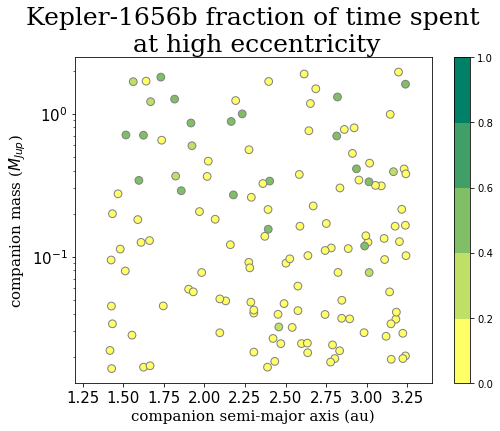

In [7]:
# fraction of time spent within 20% of Kepler-1656b versus companion properties
planet_e1_fraction = []
e1min = 0.8*e_subsat
e1max = 1.2*e_subsat
for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)
        numerator = len(m.e1[(m.e1>=e1min) & (m.e1<=e1max)])
        denominator = len(m.e1)
        planet_e1_fraction.append(numerator/denominator)
        

cmap = cm.get_cmap('summer_r', 5) 
plt.figure(figsize=(8,6))  
plt.scatter(companion_sep, companion_mass,c=planet_e1_fraction,vmin=0,vmax=1,cmap=cmap,edgecolor='grey',s=60)
plt.yscale('log')
plt.xlim(1.2,3.4)
plt.xlabel('companion semi-major axis (au)',fontsize=15,family='serif')
plt.ylabel('companion mass ($M_{Jup}$)',fontsize=15,family='serif')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.colorbar()
plt.title('Kepler-1656b fraction of time spent\n at high eccentricity',fontsize=25,family='serif')

Text(0.5, 1.0, 'Kepler-1656b fraction of time spent\n at high eccentricity')

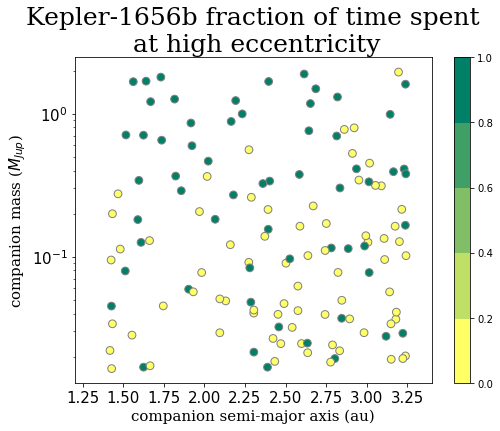

In [21]:
# ones that rise above e=0.2
eccentric = []
for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m=Model(n)
        if len(m.e1[m.e1>0.2]) == 0:
            eccentric.append(0)
        else:
            eccentric.append(1)
        

cmap = cm.get_cmap('summer_r', 5) 
plt.figure(figsize=(8,6))  
plt.scatter(companion_sep, companion_mass,c=eccentric,vmin=0,vmax=1,cmap=cmap,edgecolor='grey',s=60)
plt.yscale('log')
plt.xlim(1.2,3.4)
plt.xlabel('companion semi-major axis (au)',fontsize=15,family='serif')
plt.ylabel('companion mass ($M_{Jup}$)',fontsize=15,family='serif')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.colorbar()
plt.title('Kepler-1656b fraction of time spent\n at high eccentricity',fontsize=25,family='serif')

(0.0, 1.0)

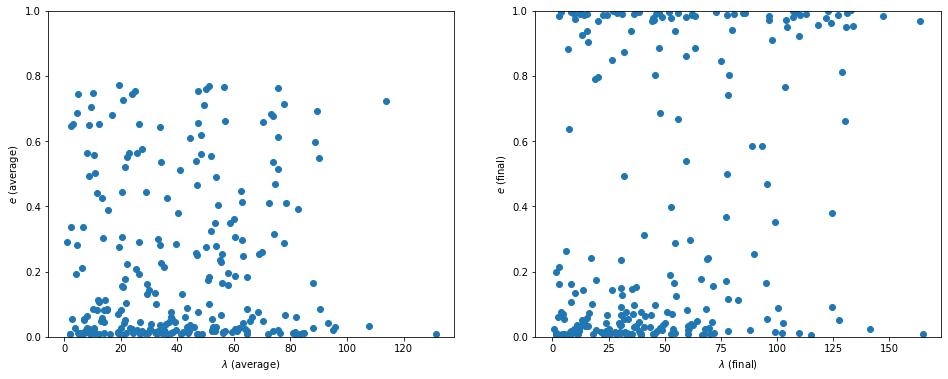

In [8]:
# e1 versus lambda - not really anything to see here
planet_lambda1_avg = []
planet_lambda1_final = []
for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)
        planet_lambda1_avg.append(np.mean(m.beta1))
        planet_lambda1_final.append(m.beta1[-1])
        
plt.figure(figsize=(16,6))  
plt.subplot(121)
plt.scatter(planet_lambda1_avg, planet_e1_avg)
plt.xlabel('$\lambda$ (average)')
plt.ylabel('$e$ (average)')
plt.ylim(0,1)
plt.subplot(122)
plt.scatter(planet_lambda1_final, planet_e1_final)
plt.xlabel('$\lambda$ (final)')
plt.ylabel('$e$ (final)')
plt.ylim(0,1)